In [1]:
from keras import models
from keras import layers
from keras import optimizers, losses, metrics
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import os

In [9]:

dataset_dir = './dataset/caltech101'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'validation')
test_dir = os.path.join(dataset_dir, 'test')


image_width = 100
image_height = 100


train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=30,
    class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_width, image_height),
    batch_size=30,
    class_mode='categorical')


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_width, image_height),
    batch_size=30,
    class_mode='categorical')


Found 2100 images belonging to 10 classes.
Found 450 images belonging to 10 classes.
Found 450 images belonging to 10 classes.


In [10]:

for data_batch, labels_batch in train_generator:
    break

In [ ]:

data_batch.shape


(30, 100, 100, 3)

In [ ]:

labels_batch.shape


(30, 10)

In [ ]:

data_batch[0]


array([[[0.92549026, 0.9215687 , 0.91372555],
        [0.8196079 , 0.80392164, 0.8078432 ],
        [0.7843138 , 0.7607844 , 0.77647066],
        ...,
        [0.12941177, 0.20392159, 0.07843138],
        [0.1764706 , 0.2509804 , 0.1254902 ],
        [0.2784314 , 0.3529412 , 0.227451  ]],

       [[0.8862746 , 0.90196085, 0.8980393 ],
        [0.8196079 , 0.82745105, 0.8235295 ],
        [0.80392164, 0.80392164, 0.80392164],
        ...,
        [0.19607845, 0.24705884, 0.14509805],
        [0.21568629, 0.26666668, 0.16470589],
        [0.22352943, 0.27450982, 0.17254902]],

       [[0.909804  , 0.9450981 , 0.9333334 ],
        [0.9843138 , 1.        , 1.        ],
        [0.90196085, 0.92549026, 0.909804  ],
        ...,
        [0.2392157 , 0.25882354, 0.17254902],
        [0.1764706 , 0.19607845, 0.10980393],
        [0.16470589, 0.18431373, 0.09803922]],

       ...,

       [[0.09803922, 0.10980393, 0.06666667],
        [0.01176471, 0.02352941, 0.        ],
        [0.0509804 , 0

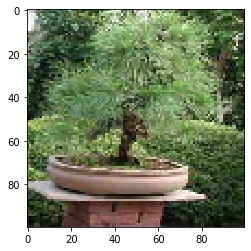

In [14]:

image = data_batch[0]

plt.imshow(image)
plt.show()


In [15]:

labels_batch[0]


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:

labels_list = train_generator.class_indices
labels_list


{'airplane': 0,
 'bonsai': 1,
 'car': 2,
 'chandelier': 3,
 'face': 4,
 'ketch': 5,
 'leopard': 6,
 'motorbike': 7,
 'turtle': 8,
 'watch': 9}

In [17]:

labels_list = dict((value, key) for key, value in labels_list.items())
labels_list


{0: 'airplane',
 1: 'bonsai',
 2: 'car',
 3: 'chandelier',
 4: 'face',
 5: 'ketch',
 6: 'leopard',
 7: 'motorbike',
 8: 'turtle',
 9: 'watch'}

In [18]:

labels_list[np.argmax(labels_batch[0])]


'bonsai'

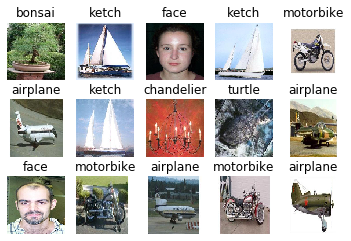

In [ ]:

rows = 3
columns = 5


for num, img in enumerate(data_batch):
    if num >= rows * columns:
        break
    
    plt.subplot(rows, columns, num+1)
    plt.title(labels_list[np.argmax(labels_batch[num])])
    plt.axis('off')
    plt.imshow(img)
    

In [ ]:
from keras.applications.vgg16 import VGG16

vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
def build_model():
    
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                            input_shape=(image_width, image_height, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))   

    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])    
    
    return model

In [21]:

model = build_model()


history = model.fit(train_generator,
                              steps_per_epoch=30,
                              epochs=10,
                              validation_data=validation_generator,
                              validation_steps=10,
                              shuffle=True)


In [ ]:
loss = history.history['loss']         
val_loss = history.history['val_loss'] 

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')      
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
acc = history.history['accuracy']           
val_acc = history.history['val_accuracy']   

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:

model.save('./model/image_cnn_model.h5')

In [ ]:

model = models.load_model('./model/image_cnn_model.h5')

Epoch 1/10


In [ ]:

results = model.evaluate(test_generator)
results


In [27]:

results = model.predict(test_generator)
results.shape


array([[3.2707234e-04, 2.3627782e-02, 2.0196130e-06, ..., 5.7091933e-01,
        1.6778123e-02, 3.5870916e-03],
       [1.0000000e+00, 2.4535207e-11, 2.2930292e-08, ..., 1.2887649e-09,
        7.7672970e-09, 3.7533123e-09],
       [1.1932274e-03, 2.8478049e-03, 2.7727413e-06, ..., 8.3261125e-07,
        7.0285429e-03, 3.6005165e-02],
       ...,
       [1.0154425e-02, 3.4997399e-08, 2.1107811e-08, ..., 9.8927897e-01,
        5.1136162e-06, 1.2458179e-05],
       [2.3402434e-03, 3.5739893e-07, 1.0355641e-05, ..., 9.8512995e-01,
        7.6621191e-06, 4.0268903e-03],
       [6.6419005e-08, 2.5453151e-10, 4.4851852e-12, ..., 9.9999630e-01,
        1.9330904e-09, 5.2148689e-08]], dtype=float32)

In [ ]:

results = np.argmax(results, 1)
results


In [37]:
train=model.predict(train_generator)
train.shape

(2100, 10)

In [38]:
train = np.argmax(train, 1)
train

array([6, 4, 9, ..., 7, 6, 9], dtype=int64)

In [40]:
valid=model.predict(validation_generator)
valid=np.argmax(valid,1)
valid

array([0, 7, 9, 0, 0, 6, 9, 7, 0, 7, 3, 0, 7, 4, 7, 4, 4, 4, 0, 0, 0, 0,
       7, 7, 4, 7, 5, 7, 4, 4, 9, 0, 7, 4, 7, 0, 0, 7, 9, 7, 0, 7, 6, 4,
       7, 4, 7, 4, 4, 0, 9, 4, 0, 0, 6, 7, 0, 0, 7, 9, 7, 4, 0, 7, 4, 7,
       0, 1, 0, 7, 0, 4, 9, 0, 0, 9, 7, 4, 0, 0, 7, 0, 7, 7, 6, 4, 3, 7,
       7, 0, 5, 1, 5, 7, 6, 0, 4, 4, 0, 0, 0, 9, 6, 0, 0, 1, 7, 9, 6, 0,
       4, 7, 7, 7, 1, 0, 7, 9, 7, 4, 0, 9, 7, 9, 9, 4, 2, 0, 4, 7, 0, 0,
       0, 0, 0, 0, 4, 4, 7, 0, 7, 0, 4, 7, 0, 8, 0, 7, 7, 7, 4, 9, 7, 7,
       7, 0, 0, 0, 0, 7, 7, 6, 0, 0, 9, 4, 0, 9, 2, 7, 0, 0, 0, 0, 2, 7,
       7, 0, 4, 0, 7, 7, 0, 7, 4, 7, 0, 0, 0, 0, 7, 0, 7, 0, 7, 6, 4, 0,
       7, 0, 3, 0, 9, 0, 4, 5, 0, 7, 0, 7, 9, 0, 1, 0, 4, 7, 2, 7, 7, 9,
       7, 9, 0, 0, 7, 0, 7, 7, 4, 3, 0, 0, 0, 0, 7, 0, 4, 2, 4, 0, 0, 4,
       6, 9, 7, 7, 4, 4, 0, 7, 7, 7, 7, 7, 0, 7, 0, 4, 0, 7, 4, 5, 4, 6,
       1, 0, 0, 7, 0, 4, 7, 4, 9, 7, 9, 0, 7, 7, 0, 0, 0, 0, 7, 7, 0, 7,
       7, 9, 9, 0, 7, 0, 0, 4, 6, 7, 7, 3, 7, 0, 9,

In [41]:
test=model.predict(test_generator)
test=np.argmax(test,1)
test

array([5, 9, 7, 0, 0, 8, 9, 7, 9, 7, 0, 4, 4, 4, 7, 7, 7, 0, 4, 4, 0, 1,
       7, 0, 0, 1, 0, 0, 4, 0, 1, 7, 0, 7, 0, 0, 5, 4, 0, 9, 0, 0, 7, 0,
       4, 7, 2, 7, 7, 6, 4, 2, 7, 7, 0, 0, 4, 0, 7, 0, 4, 4, 7, 0, 0, 0,
       6, 7, 2, 7, 7, 1, 4, 4, 0, 7, 0, 4, 7, 0, 7, 5, 2, 0, 0, 7, 4, 7,
       7, 0, 4, 0, 0, 4, 0, 4, 7, 0, 7, 7, 3, 0, 7, 5, 4, 0, 5, 0, 4, 3,
       4, 0, 4, 7, 0, 4, 7, 9, 3, 7, 9, 7, 1, 0, 7, 6, 0, 2, 2, 7, 0, 4,
       0, 0, 7, 6, 4, 9, 7, 8, 7, 4, 7, 9, 7, 7, 0, 7, 7, 0, 0, 4, 6, 6,
       6, 7, 4, 0, 0, 7, 0, 0, 0, 4, 6, 7, 7, 5, 0, 4, 6, 7, 4, 7, 7, 0,
       7, 7, 0, 4, 7, 7, 0, 0, 7, 7, 7, 2, 0, 0, 7, 4, 7, 7, 7, 6, 7, 1,
       7, 0, 0, 6, 0, 8, 7, 4, 9, 4, 7, 5, 7, 4, 0, 0, 0, 0, 1, 7, 5, 9,
       7, 7, 0, 3, 7, 0, 6, 0, 7, 2, 0, 0, 0, 0, 4, 7, 0, 4, 0, 6, 7, 0,
       4, 4, 0, 0, 0, 0, 0, 0, 0, 7, 0, 7, 5, 9, 0, 7, 7, 3, 0, 4, 0, 7,
       0, 7, 0, 0, 0, 0, 4, 6, 6, 7, 0, 9, 7, 4, 0, 0, 0, 9, 1, 4, 0, 3,
       0, 4, 4, 0, 0, 7, 4, 4, 7, 6, 9, 3, 6, 9, 2,

In [43]:
result=np.concatenate([train,valid,test])
len(result)

3000

In [57]:
mm=np.concatenate([train_generator.labels,validation_generator.labels,test_generator.labels])
len(mm)

3000

In [ ]:

for data_batch, labels_batch in test_generator:
    break
    

image = data_batch[0]

plt.imshow(image)
plt.show()


In [ ]:

results = model.predict(data_batch)


labels_list[np.argmax(results[0])]
